In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1. Inserting the iris dataset


In [19]:
# including the iris dataset in the code
dataset = datasets.load_iris()
# dataset display
dataset


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
# displaying dataset features
attributes=dataset.feature_names
attributes

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
#  value for attributes
A = (dataset.data)
A
B = (dataset.target)
B 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# data selected for testing sets and training
A_train, A_test, B_train, B_test = train_test_split(A,B, random_state = 40, test_size=0.2)

2. Intro to Regression

In [40]:
# Regression class
class LR():
    def  __init__(self, bias = 0):
        self.bias = bias
        self.weight = None
     #adding fit method
    def fit(self, A, B_actual, epochs = 100, batch_size = 32, lr = 0.01):
        #Adding 1 Atrribute in set
        n_attributes = A.shape[1]
    
        #initialize weight as 1 and bias as 0
        wt = np.ones(shape = (n_attributes))
        bs = self.bias
        
        #lists to record the loss
        mse_list = []
        step_num_list = []
        
        #records in total
        n_rec = A.shape[0]
        
        # Batches
        n_bch = int(n_rec/batch_size)
    
        # for iteration
        for i in range(epochs):
        
            # Array of random value to records
            rand_vals = np.random.permutation(n_rec)
        
            # indices
            A_tmp = A[rand_vals]
            B_tmp = B_actual[rand_vals]
        
            # calculating gd in batches
            for batch in range(0, n_rec, batch_size):
                A_batch = A_tmp[batch : batch+batch_size]
                B_batch = B_tmp[batch : batch+batch_size]
            
                # Prediction for batches
                
                B_prd = (wt @ A_batch.T) + bs
            
                # introducing new values for weight and bias
                new_bs = -(2/len(A_batch))*np.sum(B_batch-B_prd)
                new_wt =  -(2/len(A_batch)) * (A_batch.T @ (B_batch - B_prd))
                
            
                # performing update on weight and bias
                wt = wt - lr * new_wt
                bs = bs - lr * new_bs
            
                # MSE
                mse = np.mean((B_batch - B_prd)**2)
        
            # APPENDING MSE AND STEP
            mse_list.append(mse)
            step_num_list.append(i)        
        
        return wt, bs, mse, mse_list, step_num_list

        # Prediction method
    def predict(self, A, weight, bias):
        predict = []

        for i in range(len(A)):
            B_prd = weight * A[i] + bias
            predict.append(B_prd)

        return predict
    #Plot Graphs
    def plot_loss(self, mse_list, step_num_list):
        plt.figure(figsize=(10,9))
        plt.plot(step_num_list, mse_list)
        plt.scatter(step_num_list, mse_list, marker=".", c= '#b021b5', cmap='red', edgecolors="black")
        plt.xlabel("Step number", fontsize = 10)
        plt.ylabel("Loss", fontsize = 10)
        plt.show()
        plt.show()
    #accurate graphs
    def accuracy(self, prd, B):
        loss = np.mean((B - prd)**2)
        return loss

3. Linear Regression with Regularisation

In [59]:
# Regression class
class LR1():
    def  __init__(self, bias = 0):
        self.bias = bias
        self.weight = None
     #adding fit method
    def fit(self, A, B_actual,L=1, epochs = 100, batch_size = 32, lr = 0.01):
        #Adding 1 Atrribute in set
        n_attributes = A.shape[1]
    
        #initialize weight as 1 and bias as 0
        wt = np.ones(shape = (n_attributes))
        bs = self.bias
        
        #lists to record the loss
        mse_list = []
        step_num_list = []
        
        #records in total
        n_rec = A.shape[0]
        
        # Batches
        n_bch = int(n_rec/batch_size)
    
        # for iteration
        for i in range(epochs):
        
            # Array of random values to records
            rand_vals = np.random.permutation(n_rec)
        
            # indices
            A_tmp = A[rand_vals]
            B_tmp = B_actual[rand_vals]
        
            # calculating gd in batches
            for batch in range(0, n_rec, batch_size):
                A_batch = A_tmp[batch : batch+batch_size]
                B_batch = B_tmp[batch : batch+batch_size]
            
                # Prediction for batches
                
                B_prd = (wt @ A_batch.T) + bs
            
                # introducing new values for weight and bias
                new_bs = -(2/len(A_batch))*np.sum(B_batch-B_prd)
                new_wt =  -(2/len(A_batch)) * (A_batch.T.dot(B_batch - B_prd)) + ((L) * (wt**2))
                
            
                # performing update on weight and bias
                wt = wt - lr * new_wt
                bs = bs - lr * new_bs
            
                # MSE
                mse = np.mean((B_batch - B_prd)**2)
        
            # APPENDING MSE AND STEP
            mse_list.append(mse)
            step_num_list.append(i)        
        
        return wt, bs, mse, mse_list, step_num_list

        # Prediction method
    def predict(self, A, weight, bias):
        predict = []

        for i in range(len(A)):
            B_prd = weight * A[i] + bias
            predict.append(B_prd)

        return predict
    #Plot Graphs
    def plot_loss(self, mse_list, step_num_list):
        plt.figure(figsize=(10,9))
        plt.plot(step_num_list, mse_list)
        plt.scatter(step_num_list, mse_list, marker=".", c= '#b021b5', cmap='red', edgecolors="black")
        plt.xlabel("Step number", fontsize = 10)
        plt.ylabel("Loss", fontsize = 10)
        plt.show()
        plt.show()
    #accurate graph    
    def accuracy(self, prd, B):
        loss = np.mean((B - prd)**2)
        return loss

Training

Weight =  [0.43547749]
Bias =  0.4409391960543027
MSE =  0.3423461201039992


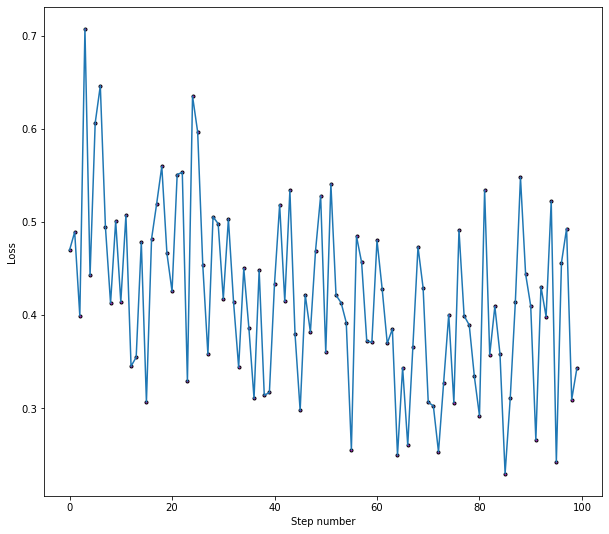

In [45]:
#sepal length and sepal width
cl1 = LR()
wt0, bs0, mse0, mse_list0, step_num_list0 = cl1.fit(A_train[:,0:1], A_train[:,1])
print("Weight = ", wt0)
print("Bias = ", bs0)
print("MSE = ", mse0)
cl1.plot_loss(mse_list0, step_num_list0)

Weight =  [0.82922454]
Bias =  -1.0733347581229795
MSE =  1.3800565282983364


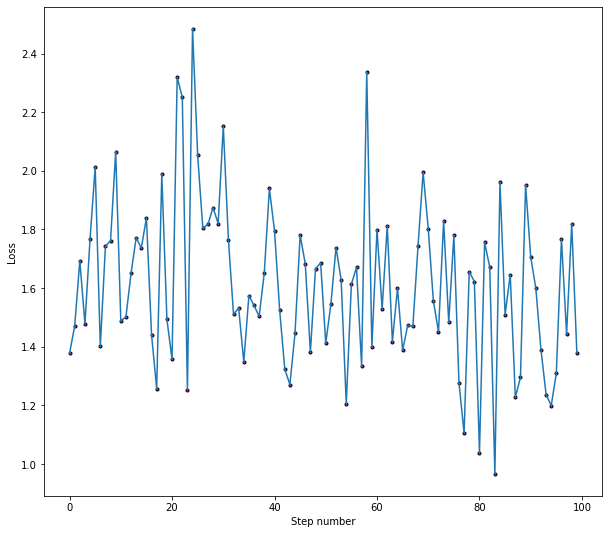

In [46]:
# sepal length and petal length
cl2 = LR()
wt1, bs1, mse1, mse_list1, step_num_list1 = cl2.fit(A_train[:,0:1], A_train[:,2])
print("Weight = ", wt1)
print("Bias = ", bs1)
print("MSE = ", mse1)
cl2.plot_loss(mse_list1, step_num_list1)

Weight =  [0.31986539]
Bias =  -0.5652025133071666
MSE =  0.3258525371026825


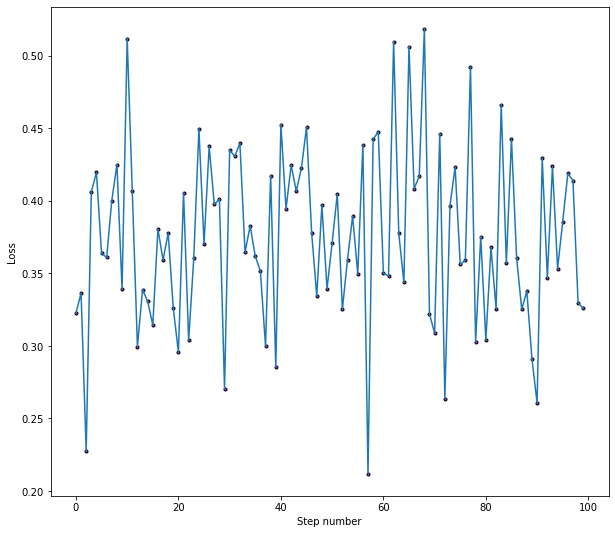

In [48]:
#sepal length and petal width
cl3 = LR()
wt2, bs2, mse2, mse_list2, step_num_list2 = cl3.fit(A_train[:,0:1], A_train[:,3])
print("Weight = ", wt2)
print("Bias = ", bs2)
print("MSE = ", mse2)
cl3.plot_loss(mse_list2, step_num_list2)


Weight =  [1.4932356]
Bias =  1.143756319018499
MSE =  1.1981648462473569


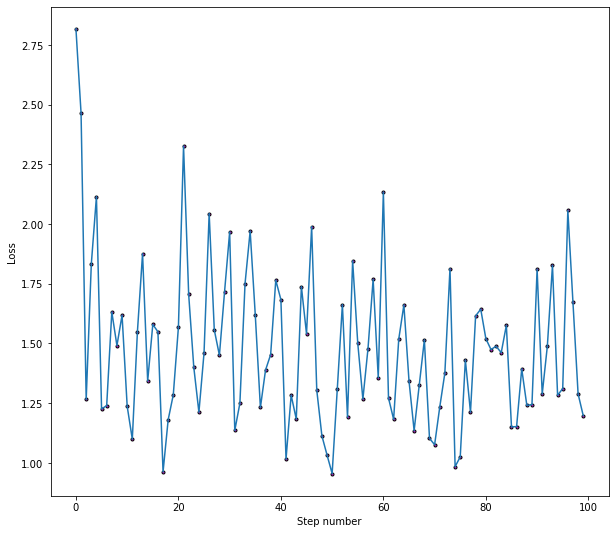

In [49]:
#sepal width and petal length
cl4 = LR()
wt3, bs3, mse3, mse_list3, step_num_list3 = cl4.fit(A_train[:,1:2], A_train[:,0])
print("Weight = ", wt3)
print("Bias = ", bs3)
print("MSE = ", mse3)
cl4.plot_loss(mse_list3, step_num_list3)

Weight =  [0.70819397]
Bias =  1.3475794322233452
MSE =  3.8440913320971313


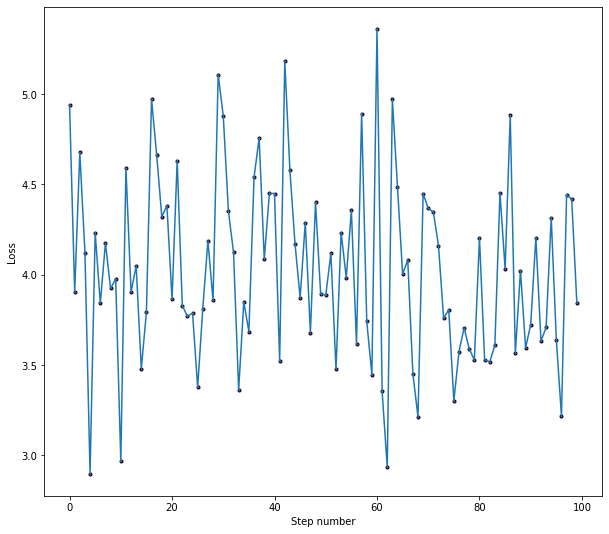

In [50]:
#sepal width and petal length
cl5 = LR()
wt4, bs4, mse4, mse_list4, step_num_list4 = cl5.fit(A_train[:,1:2], A_train[:,2])
print("Weight = ", wt4)
print("Bias = ", bs4)
print("MSE = ", mse4)
cl5.plot_loss(mse_list4, step_num_list4)

Weight =  [0.2654819]
Bias =  0.30104758576540463
MSE =  0.6987192654547018


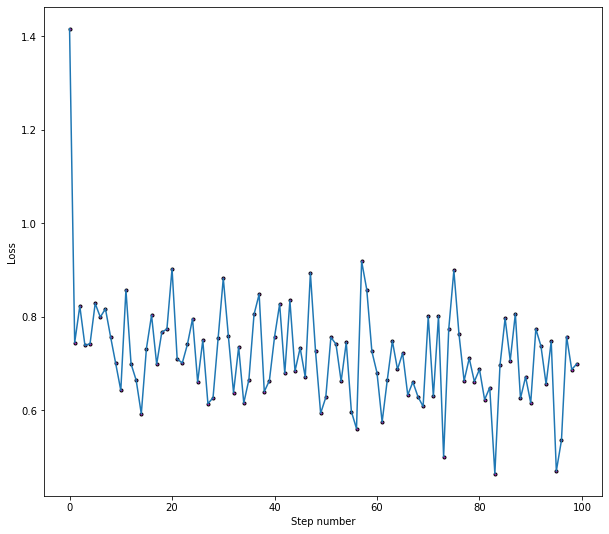

In [51]:
#Sepal width and petal width
cl6 = LR()
wt5, bs5, mse5, mse_list5, step_num_list5 = cl6.fit(A_train[:,1:2], A_train[:,3])
print("Weight = ", wt5)
print("Bias = ", bs5)
print("MSE = ", mse5)
cl6.plot_loss(mse_list5, step_num_list5)

Regularization Test

Weight =  [0.83396323]
Bias =  -1.0748878136618436
MSE =  1.6637211315868203


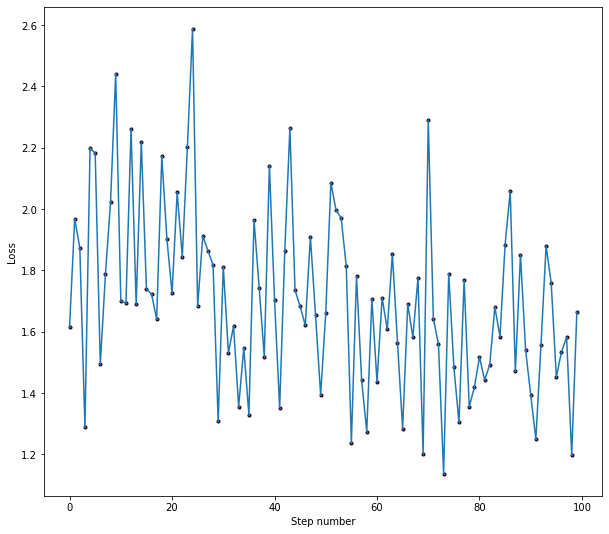

In [52]:
# Without Regularization
cl2 = LR()
wt1, bs1, mse1, mse_list1, step_num_list1 = cl2.fit(A_train[:,0:1], A_train[:,2])
print("Weight = ", wt1)
print("Bias = ", bs1)
print("MSE = ", mse1)
cl2.plot_loss(mse_list1, step_num_list1)

Weight =  [0.71563877]
Bias =  -0.490504360206123
MSE =  1.3487825394790773


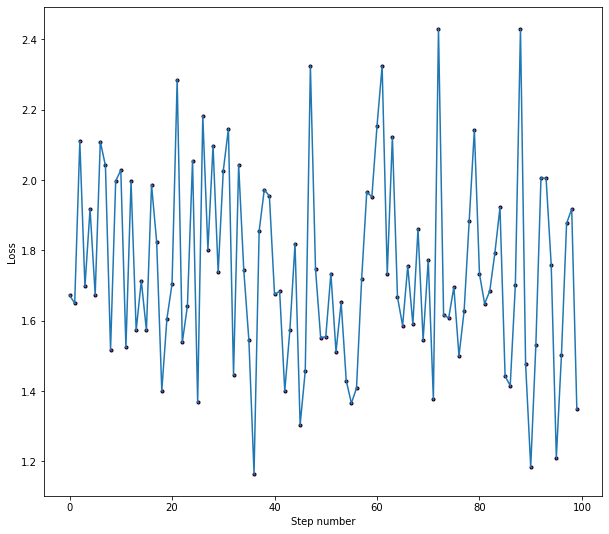

In [60]:
# With Regularization
cl2 = LR1()
wt1, bs1, mse1, mse_list1, step_num_list1 = cl2.fit(A_train[:,0:1], A_train[:,2], 2)
print("Weight = ", wt1)
print("Bias = ", bs1)
print("MSE = ", mse1)
cl2.plot_loss(mse_list1, step_num_list1)


Testing

In [61]:
#cl1
#prediction
prd0 = cl1.predict(A_test[:,0:1], wt0, bs0)
#loss
loss0 = cl1.accuracy(prd0, A_test[:,1])
print("MSE = ",loss0)

MSE =  0.2918563671680797


In [62]:
#cl2
#prediction
prd1 = cl2.predict(A_test[:,0:1], wt1, bs1)
#loss
loss1 = cl2.accuracy(prd1, A_test[:,2])
print("MSE = ",loss1)

MSE =  3.267662499104412


In [63]:
#cl3
#prediction
prd2 = cl3.predict(A_test[:,0:1], wt2, bs2)
loss2 = cl3.accuracy(prd2, A_test[:,3])
print("MSE = ",loss2)

MSE =  0.6394997713220787


In [64]:
#cl4
#prediction
prd3 = cl4.predict(A_test[:,1:2], wt3, bs3)
#loss
loss3 = cl4.accuracy(prd3, A_test[:,0])
print("MSE = ",loss3)

MSE =  1.0758427151653056


In [66]:
#cl5
#prediction
prd4 = cl5.predict(A_test[:,1:2], wt4, bs4)
#loss
loss4 = cl5.accuracy(prd4, A_test[:,2])
print("MSE = ",loss4)

MSE =  3.1475580604087643


In [68]:
#cl6
#prediction
prd5 = cl6.predict(A_test[:,1:2], wt5, bs5)
#loss
loss5 = cl6.accuracy(prd5, A_test[:,3])
print("MSE = ",loss5)

MSE =  0.6195758708248766


From Test Sepal Length is most predictive to predict sepal width by error being just 0.29.